 # Projeto ciencia de dados
 ### Passo 1: Definição do problema
O objetivo deste projeto será explorar e analisar os dados de saúde e hábitos de vida para identificar padrões que possam influenciar a qualidade do sono e o nível de atividade física.

In [32]:
import pandas as pd

#Carregar as dados 
dados = pd.read_csv("dados.csv")


 #### Passo 2: Carregamento e visualização dos dados

Primeiro, vamos carregar os dados e visualizar suas características. A ideia aqui é entender como os dados estão organizados e se há valores ausentes.

In [33]:
# Exiba as primeiras lihas do Dataframe
dados.head()

,User ID,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage
0,1,25,f,8,23:00,06:30,8000,2500,medium,healthy,no,no
1,2,34,m,7,00:30,07:00,5000,2200,low,unhealthy,yes,yes
2,3,29,f,9,22:45,06:45,9000,2700,high,healthy,no,no
3,4,41,m,5,01:00,06:30,4000,2100,low,unhealthy,yes,no
4,5,22,f,8,23:30,07:00,10000,2800,high,medium,no,no


### Passo 3: Limpeza e preparação dos dados

Verificar e tratar valores ausentes.
Converter colunas como Bedtime e Wake-up Time para um formato de tempo adequado.
Normalizar colunas numéricas se necessário (como Daily Steps e Calories Burned).

In [34]:
# Verificar dados ausentes
dados.isnull().sum()

# Converter Bedtime e Wake-up Time para datetime 
dados['Bedtime'] = pd.to_datetime(dados['Bedtime'], format='%H:%M')
dados['Wake-up Time'] = pd.to_datetime(dados['Wake-up Time'], format='%H:%M')

 ### Passo 4: Análise exploratória
Aqui vamos explorar a relação entre variáveis como "Sleep Quality", "Daily Steps", "Physical Activity Level" e "Dietary Habits".

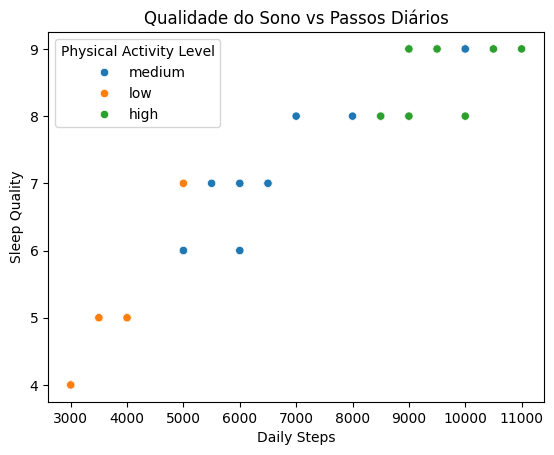

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exemplo: relação entre Sleep Quality e Daily Steps
sns.scatterplot(x='Daily Steps', y='Sleep Quality', hue='Physical Activity Level', data=dados)
plt.title('Qualidade do Sono vs Passos Diários')
plt.show()


### Passo 5: Análise estatística
Podemos calcular correlações entre as variáveis numéricas, como passos diários e calorias queimadas.


In [36]:
# Correlação entre variáveis numéricas
correlacoes = dados[['Sleep Quality', 'Daily Steps', 'Calories Burned']].corr()
correlacoes

,Sleep Quality,Daily Steps,Calories Burned
Sleep Quality,1.000000,0.976277,0.973557
Daily Steps,0.976277,1.000000,0.986750
Calories Burned,0.973557,0.986750,1.000000


### Passo 6: Modelagem preditiva
Uma abordagem interessante seria construir um modelo que possa prever a qualidade do sono com base em características como nível de atividade física, dieta, uso de medicamentos, etc.

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Separar as variáveis independentes e dependentes
X = dados[['Daily Steps', 'Calories Burned', 'Physical Activity Level', 'Dietary Habits']]
y = dados['Sleep Quality']

# Converter colunas categóricas
X = pd.get_dummies(X)

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar um modelo de regressão
modelo = RandomForestRegressor()
modelo.fit(X_train, y_train)

# Avaliar o modelo
print(f'Acurácia do modelo: {modelo.score(X_test, y_test)}')


Acurácia do modelo: 0.969714058776807


### Passo 7: Conclusão
Após a modelagem, você poderá verificar quais variáveis têm mais impacto na qualidade do sono e também explorar recomendações baseadas nos resultados.